# Handmatige invoer variabelen

Tot nu toe zijn we bezig geweest zonder ons druk te maken over de naamgeving van onze variabelen of onze code te voorzien van uitleg, zogenaamde meta-data. Het is een goede gewoonte om daar wel zorg aan te besteden, het de lezer - maar ook jezelf - makkelijk te maken door functies en variabelen zo te noemen dat ze makkelijk leesbaar zijn. Stukken code die lastiger te begrijpen zijn kun je voorzien van commentaar. Een \# kun je gebruiken om commentaar toe te voegen.

```{exercise}
Lees de code in beide cellen. Welke code is makkelijker te volgen?
```

In de onderstaande programma worden de waarden van de variabelen 'a' en 'b' bij elkaar opgeteld.

In [ ]:
a = 9
b = 3

def s(a,b):
    s = a+b
    return print(s)

s(a,b)

Het zal vaak voorkomen dat je dezelfde berekening met steeds andere waarden voor de variablen wit uitvoeren. Dan is hrt handig om deze waarden handmatig te kunnen invoeren. Dat kan door gebruik te maken van het commando 'input', zoals in de cel hieronder is beschreven. Run de cel en kijk wat er gebeurd.

In [1]:
# code om de som van twee getallen te berekenen ion standaard python
getal_1 = float(input(f"geef de waarde voor het eerste getal"))
getal_2 = float(input(f"geef de waarde voor het tweede getal"))
# het input-commando levert in JupyterLite een variable van het type PyodideFuture. Dit kan niet worden omgezet in een float of een integer

# functie om de som van twee getallen te berekenen
def som(getal1,getal2):
    return round(getal1 + getal2, 1)

print("De som van", getal_1, "+", getal_2, "= ", som(getal_1,getal_2))

De som van 3.2 + 4.9 =  8.1


Het bovenstaande programma werkt prima in Python 3.12, maar niet in Teachbook. Dit komt doordat Teachbook met een aPyodide-kernel werkt en deze kent het commando float(input()) niet. Eenoplossing kan worden gevonden met behulp van ipywidgets. In de volgende programma's gaan we op zoek naar een geschikte manier op dit probleem op te lossen.

In [2]:
import ipywidgets as widgets
from IPython.display import display

# functie om de som van twee getallen te berekenen
def som(getal1, getal2):
    return round(getal1 + getal2, 1)

# widgets voor input
getal_1 = widgets.FloatText(description="Eerste getal:")
getal_2 = widgets.FloatText(description="Tweede getal:")
resultaat = som(getal_1.value, getal_2.value)
print(f"De som van {getal_1.value} + {getal_2.value} = {resultaat}")



De som van 0.0 + 0.0 = 0.0


In het bovenstaande script wacht het programma niet op de invoer van het eerste en tweede getal, maar gaat gelijk door naar het berekenen en printen van de variabele resultaat. Omdat er nog geen getallen zijn ingevoerd, heeft resutaat dan nog de waarde 0. 

In [1]:
import ipywidgets as widgets
from IPython.display import display

# functie om de som van twee getallen te berekenen
def som(getal1, getal2):
    return round(getal1 + getal2, 1)

# widgets voor input
getal_1 = widgets.FloatText(description="Eerste getal:")
getal_2 = widgets.FloatText(description="Tweede getal:")
button = widgets.Button(description="Bereken")

# functie om de som te berekenen en weer te geven
def bereken(b):
    resultaat = som(getal_1.value, getal_2.value)
    print(f"De som van {getal_1.value} + {getal_2.value} = {resultaat}")

button.on_click(bereken)

# display widgets
display(getal_1, getal_2, button)

FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Button(description='Bereken', style=ButtonStyle())

De som van 3.2 + 7.9 = 11.1


Script vraagt wel gegevens op en geeft het goede resultaat, maar als er in Teachbook op de button 'Bereken' wordt gedrukt, gebeurter niets.

In [2]:
import asyncio
import ipywidgets as widgets
from IPython.display import display, clear_output

# functie om de som van twee getallen te berekenen
def som(getal1, getal2):
    return round(getal1 + getal2, 1)

# widgets voor input
getal_1 = widgets.FloatText(description="Eerste getal:")
getal_2 = widgets.FloatText(description="Tweede getal:")
output = widgets.Output()

# functie om de som te berekenen en weer te geven
def bereken(change):
    with output:
        clear_output(wait=True)
        resultaat = som(getal_1.value, getal_2.value)
        print(f"De som van {getal_1.value} + {getal_2.value} = {resultaat}")

# asynchrone functie om input op te vragen
async def vraag_input():
    display(getal_1)
    while getal_1.value is None:
        await asyncio.sleep(0.1)
    display(getal_2)
    getal_2.observe(bereken, names='value')
    display(output)
    while getal_2.value is None:
        await asyncio.sleep(0.1)

# start de asynchrone input
task = asyncio.ensure_future(vraag_input())

# wacht tot de taak is voltooid
await task

FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Output()

Dit is de versie die het mooiste werkt. Het heeft namelijk geen button nodig om een resultaat te leveren. Door gebruik te maken van widgets werkt het ook in Teachbooks.

Voer de metingen in voor 10 tijdstippen (om de 10 seconden):


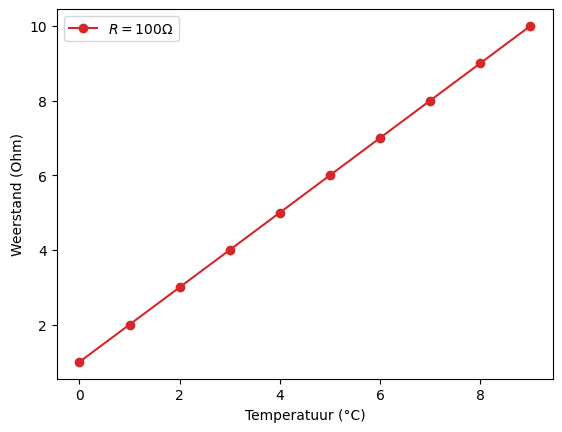

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functie om metingen in te voeren
def get_measurements():
    measurements = []
    print("Voer de metingen in voor 10 tijdstippen (om de 10 seconden):")
    for i in range(10):
        tijd = i * 10  # Tijd in seconden
        temperatuur = float(input(f"Temperatuur bij {tijd} seconden: "))
        weerstand = float(input(f"Weerstand bij {tijd} seconden: "))
        measurements.append((tijd, temperatuur, weerstand))
    return measurements

# Data ophalen
metingen = get_measurements()

# Dataframe maken
data = pd.DataFrame(metingen, columns=['Tijd (s)', 'Temperatuur (°C)', 'Weerstand (Ohm)'])

# Data plotten
color = 'tab:red'
plt.figure()
plt.plot(data['Temperatuur (°C)'], data['Weerstand (Ohm)'], color=color, marker='o',label="$R=100Ω$")

plt.xlabel('Temperatuur (°C)')
plt.ylabel('Weerstand (Ohm)')

plt.legend()
plt.show()

In [23]:
import asyncio
import ipywidgets as widgets
from IPython.display import display, clear_output

# widgets voor input
getal_1 = widgets.FloatText(description="Eerste getal:")
getal_2 = widgets.FloatText(description="Tweede getal:")
output = widgets.Output()

# lijst om de resultaten op te slaan
measurements = []

# functie om de som te berekenen en weer te geven
def bereken(change):
    with output:
        global measurements
        clear_output(wait=True)
        measurements.append((getal_1.value, getal_2.value))
        print(f"resultaat = {measurements}")
    return  

# asynchrone functie om input op te vragen
async def vraag_input():
    display(getal_1)
    while getal_1.value is None:
        await asyncio.sleep(0.1)
    display(getal_2)
    getal_2.observe(bereken, names='value')
    display(output)
    while getal_2.value is None:
        await asyncio.sleep(0.1)

number_measurement = 0
for i in range(1,4):    
    print(f"meting nummer: {i}")
    
    number_measurement = number_measurement + 1
    print(f"aantal metingen {number_measurement}")
    print(f"meetwaarden = {measurements}")
    
    # start de asynchrone input
    task = asyncio.ensure_future(vraag_input())
    
    # wacht tot de taak is voltooid
    await task


meting nummer: 1
aantal metingen 1
meetwaarden = []


FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Output()

meting nummer: 2
aantal metingen 2
meetwaarden = []


FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Output()

meting nummer: 3
aantal metingen 3
meetwaarden = []


FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Output()

Het programma vraagt het goede aantal keren de in te voeren waarden op en bewaart deze in de lijst measurements. Binnen de routine 'bereken' gaat dit goed, maar de lijst is buiten deze routine leeg. Dit komt doordat het programma niet voldoende asynchroon werkt.